<center> <h1>Workshop: precision of univariate slope coefficient</h1> </center> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random

## 1. The true slope coefficient
For this exercise we pretend that we actually have access to the population from which a specific sample is drawn. This allows us to study the behavior of different samples drawn from the same population, a key aspect when thinking about the precision of regression estimates. We first load the population data and estimate the regression on the whole population. This regression allows us to obtain the “true” regression relationship which we are hoping to approximate with estimates from a sample.

In [2]:
pop = pd.read_csv('red_meat_population.csv')
pop.head()

,user_id,red_meat,cardiac_risk
0,1,5,5.551477
1,2,5,5.494118
2,3,5,4.230111
3,4,3,6.883890
4,5,1,4.078691


**Q:** What is the true slope coefficient (the effect of red meat on cardiac risk in the population regression)?

In [3]:
model = smf.ols(formula = 'cardiac_risk ~ red_meat', data = pop)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           cardiac_risk   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     5645.
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:17:55   Log-Likelihood:            -1.4617e+05
No. Observations:              100000   AIC:                         2.923e+05
Df Residuals:                   99998   BIC:                         2.924e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9969      0.006    616.228      0.0

In [4]:
result.params[1]

0.12020923283422694

## 2. Finite sample unbiasedness and distribution of the slope estimator

Now we show the finite sample properties of the slope estimator by randomly drawing many different samples (each sample of size 100) from the population. We want to show the property of unbiasedness (that, on average across these draws, the estimator is close to the true coefficient). We also want to see if the distribution of the estimator across the draws is well approximated by a normal.

Write code to draw 20 different samples of size 100 from the population and obtain 20 different regression coefficients (seeding makes sure you get the same number each time, but the estimates might still differ across different computers due to version differences). Report the distribution of the slope estimator (histogram) and the mean of the estimator across the 20 samples.

In [5]:
random.seed(123)    # We set a seed

coeffs = []

for i in range(20):
    temp = pop.sample(100)
    temp_model = smf.ols(formula = 'cardiac_risk ~ red_meat', data = temp)
    temp_result = temp_model.fit()
    coeff = temp_result.params[1]
    coeffs.append(coeff)


In [6]:
np.mean(coeffs)

0.12885427524555215

Text(0, 0.5, 'Frequency')

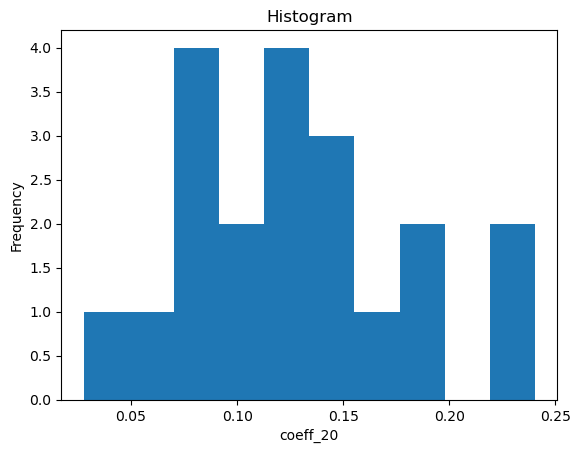

In [7]:
plt.hist(coeffs)
plt.title("Histogram")
plt.xlabel("coeff_20")
plt.ylabel("Frequency")

Compare the mean coefficient across these 20 samples to the true coefficient and the shape of the distribution to a normal distribution. Then modify the code in order to generate 1000 instead of 20 samples and answer the question again.

In [53]:
random.seed(123)    # We set a seed

coeffs = []

for i in range(1000):
    temp = pop.sample(100)
    temp_model = smf.ols(formula = 'cardiac_risk ~ red_meat', data = temp)
    temp_result = temp_model.fit()
    coeff = temp_result.params[1]
    coeffs.append(coeff)


In [54]:
np.mean(coeffs)

0.11802906328099391

(array([  2.,  11.,  44., 140., 217., 241., 203.,  99.,  36.,   7.]),
 array([-0.05768312, -0.02485079,  0.00798154,  0.04081387,  0.0736462 ,
         0.10647853,  0.13931086,  0.17214319,  0.20497552,  0.23780785,
         0.27064018]),
 <BarContainer object of 10 artists>)

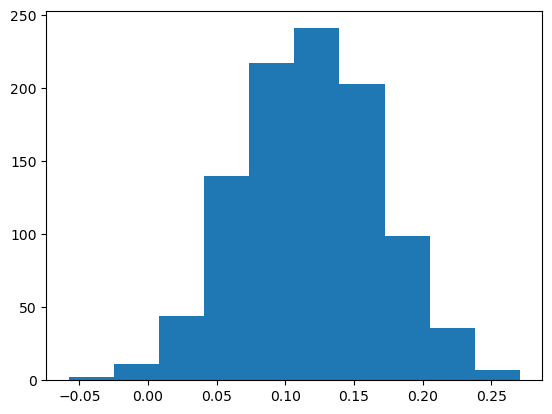

In [55]:
plt.hist(coeffs)